# Matplotlib

$$
\begin{cases}
8.2x_1 + 7.9x_2 = 123 \\
11.2x_1 + 16.3x_2 = 201 \\
-16.3x_1 - 8.3x_2 = 169
\end{cases}
$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
equations = ['$8.2x_1 + 7.9x_2 = 123$', '$11.2x_1 + 16.3x_2 = 201$', '$-16.3x_1 - 8.3x_2 = 169$']
x_1 = np.linspace(-45, 20, 1000)
f = [(123 - 8.2 * x_1)/7.9, (201 - 11.2 * x_1)/16.3, (169 + 16.3 * x_1)/(-8.3)]

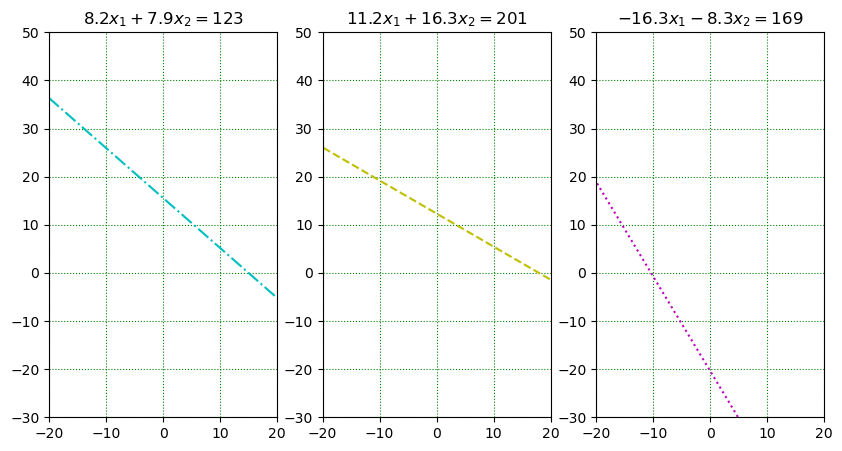

In [9]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 5))

for i, ax_ in enumerate(axes):
    ax_.set(xlim=(-20, 20), ylim=(-30, 50), title=equations[i])
    ax_.grid(linestyle=':', color='green')

axes[0].plot(x_1, f[0], '-.c')
axes[1].plot(x_1, f[1], '--y')
axes[2].plot(x_1, f[2], ':m')

plt.savefig('images/equations_separate.png')
plt.savefig('images/equations_separate.jpg')
plt.savefig('images/equations_separate.svg')

plt.show()

In [10]:
matrices = [np.array([[8.2, 7.9],[11.2, 16.3]]), np.array([[11.2, 16.3],[-16.3, -8.3]]), np.array([[8.2, 7.9],[-16.3, -8.3]])]
rhs = [np.array([123, 201]), np.array([201, 169]), np.array([123, 169])]
solutions = [np.linalg.solve(matrices[i], rhs[i]) for i in range(len(matrices))]

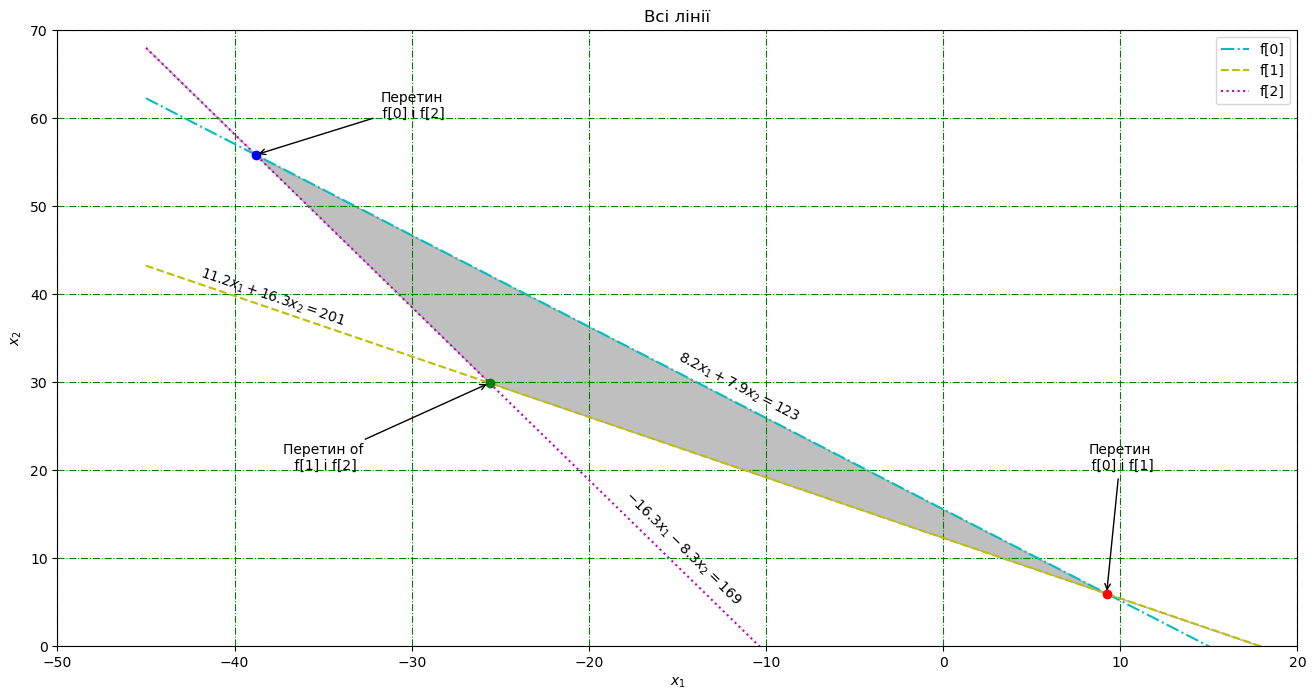

In [11]:
fig = plt.figure(figsize=(16, 8), dpi=100)
ax = plt.axes()
fig.add_axes(ax)
ax.set(xlim=(-50, 20), ylim=(0, 70), xlabel='$x_1$', ylabel='$x_2$', title='Всі лінії')
ax.grid(linestyle='-.', color='green')

ax.plot(x_1, f[0], '-.c', label='f[0]')
ax.plot(x_1, f[1], '--y', label='f[1]')
ax.plot(x_1, f[2], ':m', label='f[2]')

arctans = [math.degrees(math.atan(-8.2/7.9)), math.degrees(math.atan(-11.2/16.3)), math.degrees(math.atan(-16.3/8.3))]
locations = [(-15, 32.5), (-42, 42), (-18, 17)]

ax.text(*locations[0], equations[0], rotation=arctans[0], rotation_mode = 'anchor', transform_rotates_text = True)
ax.text(*locations[1], equations[1], rotation=arctans[1], rotation_mode = 'anchor', transform_rotates_text = True)
ax.text(*locations[2], equations[2], rotation=arctans[2], rotation_mode = 'anchor', transform_rotates_text = True)

ax.plot(*solutions[0], marker='o', color='r')
ax.plot(*solutions[1], marker='o', color='g')
ax.plot(*solutions[2], marker='o', color='b')

y_1 = np.maximum(f[1], f[2])
y_2 = np.maximum(f[0], y_1)
plt.fill_between(x_1, y_1, y_2, color='grey', alpha=0.5)

ax.annotate(f"Перетин\n f[0] і f[1]", ha="center", xy=solutions[0], xytext=(10, 20), arrowprops=dict(arrowstyle="->"))
ax.annotate(f"Перетин of\n f[1] і f[2]", ha="center", xy=solutions[1], xytext=(-35, 20), arrowprops=dict(arrowstyle="->"))
ax.annotate(f"Перетин\n f[0] і f[2]", ha="center", xy=solutions[2], xytext=(-30, 60), arrowprops=dict(arrowstyle="->"))

ax.legend()

plt.savefig('images/equations_merged.png')
plt.savefig('images/equations_merged.jpg')
plt.savefig('images/equations_merged.svg')

plt.show()